# Feature Engineering and Selection


> Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.

— Andrew Ng, ML researcher, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)

## Why Feature Engineering Matters



**Feature engineering means understanding the data to create features that make machine learning algorithms work.**

Yes, [selecting the right algorithm and parameters also matters](../ml/ml-algo-hyperparameter.ipynb), but in practice having and using the right features for the task is what makes ML work.

## How good features look like

Remember the **Iris** dataset? The measurements of the flower's petal and sepal dimensions are a good example of features that allow separation of observations into classes.

In [1]:
import data_science_learning_paths
data_science_learning_paths.setup_plot_style(dark=True)

In [2]:
iris_data = data_science_learning_paths.datasets.read_iris()

In [3]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
import seaborn

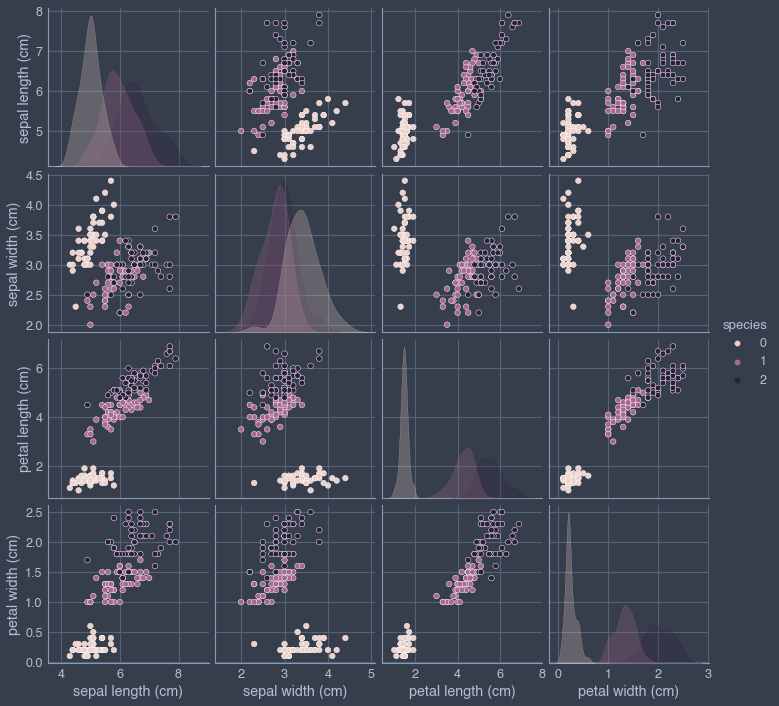

In [5]:
seaborn.pairplot(
    iris_data,
    vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
    hue="species"
)

A scatterplot of each pair of dimensions shows that the datapoints for the different species form distinct clusters. Separating these clusters of points with a decision boundary is the job of a classifier - and if we see a picture like this, the job is probably easy. Visualizing the attributes in a pair plot can also help us us discover and select good features.

## Example: Feature Engineering for Titanic Survival Model

In [6]:
import pandas

In [7]:
data_path = "../.assets/data/titanic/titanic.csv"

In [8]:
titanic_data = pandas.read_csv(data_path)

In [9]:
!cat ../.assets/data/titanic/titanic-documentation.txt

Data Dictionary

Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	    Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	    Sex 	
Age 	    Age in years 	
sibsp 	    # of siblings / spouses aboard the Titanic 	
parch 	    # of parents / children aboard the Titanic 	
ticket 	    Ticket number 	
fare 	    Passenger fare 	
cabin 	    Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for t

### Feature Idea: Cabins and Decks

This is an example of using some more domain knowledge to come up with a feature: We notice that we have a cabin number for some of the passengers on the list:

In [10]:
titanic_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Do you notice a pattern? The cabin number starts with a letter. What could that mean? Let's have a look at the blueprints:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/515px-Titanic_cutaway_diagram.png) 
*cutaway diagram of the RNS Titanic - Source: Wikimedia Commons*

As we see, the letters refer to the ship's decks, from top to bottom. This gives us a promising hypothesis: Perhaps your chances of survival in the disaster depend on the placement of your cabin in the ship. We should test this hypothesis by deriving the deck as a new feature from the cabin number and providing it to our model.

#### Exercise: Cabins and Decks

Derive the deck as a feature from the cabin number!

In [11]:
# TODO: your code here



### Feature Idea: Ticket Prices

Were rich passengers better off, also in the moment of the disaster? We should test this hypothesis and see if it helps with survival prediction. We do not know the net worth of each passenger, but we do know their ticket class, and furthermore, there is information on how much they paid for the voyage. So, as an example of increasing our understanding of the data to generate features, take a closer look at the field `Fare`, the ticket price paid. What exactly are the values? The documentation does not give much detail.

/Users/cls/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

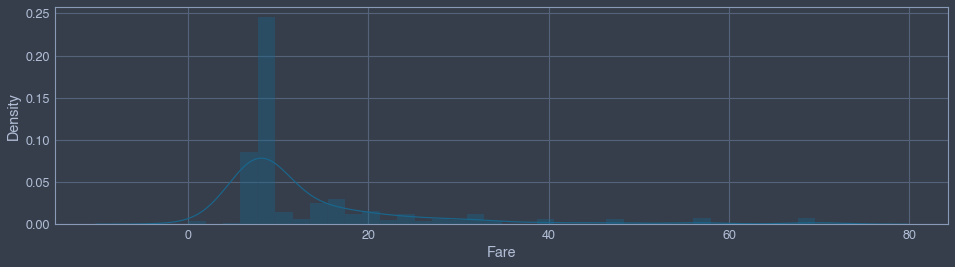

In [12]:
seaborn.distplot(titanic_data[titanic_data["Pclass"] == 3]["Fare"])

With some simple data analysis, we can notice that there is a fairly large spread of ticket prices even in the 3rd class. Were there large differences in luxury for 3rd class passengers depending on how much they paid? Unlikely! If we want to incorporate `Fare` as a feature into our model, we should understand it better. 

#### Exercise: Ticket Prices

Investigate the relationships of `Fare` with other attributes and derive better features!

In [13]:
# TODO: your code here



### Exercise: More Feature Ideas?

Do you have more ideas for useful features for the Titanic survical model?

## Selecting Features by Importance

Many implementations of machine learning models (e.g. found in `scikit-learn`) provide a way to access weights given to the features, depending on how important the features are for the model's decision. Computing and visualizing **feature importance** after model training is a helpful step in feature engineering.

Continue with our chapter on **[📓 Feature Importance](../ml/ml-feature-importance.ipynb)** to learn more about this.

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2025 [Point 8 GmbH](https://point-8.de)_